# 课堂示例代码复刻

## 数据准备

In [17]:
import pandas as pd # 数据表
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [18]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [19]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


## 词向量模型

词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。

使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

In [20]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [21]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [22]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [23]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.6830981   0.9924534   0.4112518  -0.14569594 -0.36267966 -2.159297
  0.7668164   2.816045   -1.0796698  -1.1567559  -0.52624017 -1.9052029
 -0.2223662   1.1958854   0.57358724 -0.5966747   0.50605136 -0.6666339
 -0.202738   -2.1089878   1.0463566  -0.0092096   0.5858754  -0.7219376
 -0.11876088  0.2773492  -0.43402666 -0.7671326  -1.021094   -0.16619766
  1.0892428   0.5285902   0.3833205  -0.77292466 -0.74337405  1.6501962
  0.49144223 -0.9415111  -1.0794578  -2.2664828   0.02282776 -0.686037
 -0.11285064 -0.8628837   1.1009296  -0.7594393  -1.4190975   0.38741636
  1.2420838   0.78655684  0.3938645  -0.4607278  -0.6959079  -0.16000262
 -0.5750252   0.9937149   0.19809034  0.11213331 -0.6184453   0.3890621
  0.321331    0.42632166 -0.47358197  0.68402743 -0.79394925  1.3716313
  0.07875574  0.9071093  -1.3757706   1.6887753  -0.7038728   1.1958556
  0.70315874 -0.08753791  1.7134644   0.3980834   0.13334401 -0.25742218
 -0.48365384  0.4753494  -0.65892625  0.25050133 -1.1180007

In [24]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.7364117
0.67702097
0.638952
0.99240744
0.98623186
0.9946148


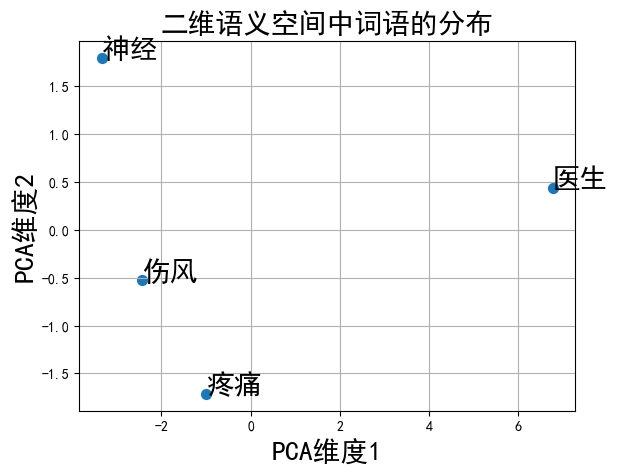

In [25]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [26]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 69775.5
Loss after epoch 1: 68883.21875
Loss after epoch 2: 64564.328125
Loss after epoch 3: 62369.046875
Loss after epoch 4: 48786.0625
Loss after epoch 5: 45801.78125
Loss after epoch 6: 43129.40625
Loss after epoch 7: 42484.84375
Loss after epoch 8: 40288.75
Loss after epoch 9: 44951.5625
Loss after epoch 10: 38759.75
Loss after epoch 11: 42023.25
Loss after epoch 12: 36533.25
Loss after epoch 13: 39628.125
Loss after epoch 14: 34589.625
Loss after epoch 15: 32618.5
Loss after epoch 16: 36448.3125
Loss after epoch 17: 35313.625
Loss after epoch 18: 29969.875
Loss after epoch 19: 30056.5625
Loss after epoch 20: 32609.875
Loss after epoch 21: 31840.875
Loss after epoch 22: 27006.75
Loss after epoch 23: 30496.875
Loss after epoch 24: 29546.0625
Loss after epoch 25: 25096.1875
Loss after epoch 26: 25436.625
Loss after epoch 27: 23980.125
Loss after epoch 28: 27106.0
Loss after epoch 29: 26688.875
Loss after epoch 30: 23704.375
Loss after epoch 31: 25756.125
Loss afte

# 自我收集数据探索

## 数据准备

In [10]:
import pandas as pd # 数据表
df = pd.read_csv('combined_data.csv', index_col = 0)
df

,title,content
date,,
20160204,传承红色基因 让人民生活蒸蒸日上,春佳节前夕，习近平总书记来到了江西，深入乡村、企业、学校、社区、革命根据地纪念馆，看望慰问广...
20160204,李克强主持召开国务院常务会议,国务院总理李克强2月3日主持召开国务院常务会议，部署建设双创基地发展众创空间，加快培育新动能...
20160204,俞正声与全国性宗教团体负责人迎春座谈,中共中央政治局常委、全国政协主席俞正声4日邀请全国性宗教团体负责人座谈，共庆新春佳节，并代表...
20160204,俞正声会见柬埔寨副首相,全国政协主席俞正声4日在人民大会堂会见柬埔寨副首相兼外交国际合作大臣贺南洪。 俞...
20160204,国务院印发《关于钢铁行业化解过剩产能实现脱困发展的意见》,经李克强总理签批，国务院日前印发《关于钢铁行业化解过剩产能实现脱困发展的意见》。 ...
...,...,...
20230225,国内联播快讯,“春风行动”已发布岗位2700万个1月以来，人力资源社会保障部会同工业和信息化部等10部门联...
20230225,多国人士积极评价中方发布的《关于政治解决乌克兰危机的中国立场》文件,多国人士积极评价中国外交部发布的《关于政治解决乌克兰危机的中国立场》文件。哈萨克斯坦外交部今...
20230225,俄称摧毁乌军指挥所 乌称击落俄直升机,俄罗斯国防部24日称，俄军在库皮扬斯克等多地打击了乌军人员和武器装备，俄军还在顿涅茨克摧毁了...


In [11]:
import jieba  #中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['content'][0]
clean_text(test)[:10]

C:\Users\Sun Yedi\AppData\Local\Temp\ipykernel_16828\3891733223.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test = df['content'][0]


'春 佳节 前夕 ， '

In [12]:
df['content分词'] = df['content'].fillna(" ").apply(clean_text)
df[:10]

,title,content,content分词
date,,,
20160204,传承红色基因 让人民生活蒸蒸日上,春佳节前夕，习近平总书记来到了江西，深入乡村、企业、学校、社区、革命根据地纪念馆，看望慰问广...,春 佳节 前夕 ， 习近平 总书记 来到 了 江西 ， 深入 乡村 、 企业 、 学校 、 ...
20160204,李克强主持召开国务院常务会议,国务院总理李克强2月3日主持召开国务院常务会议，部署建设双创基地发展众创空间，加快培育新动能...,国务院 总理 李克强 2 月 3 日 主持 召开 国务院 常务会议 ， 部署 建设 双创 基...
20160204,俞正声与全国性宗教团体负责人迎春座谈,中共中央政治局常委、全国政协主席俞正声4日邀请全国性宗教团体负责人座谈，共庆新春佳节，并代表...,中共 中央政治局常委 、 全国政协 主席 俞正声 4 日 邀请 全国性 宗教团体 负责人 座...
20160204,俞正声会见柬埔寨副首相,全国政协主席俞正声4日在人民大会堂会见柬埔寨副首相兼外交国际合作大臣贺南洪。 俞...,全国政协 主席 俞正声 4 日 在 人民大会堂 会见 柬埔寨 副 首相 兼 外交 国际 合作...
20160204,国务院印发《关于钢铁行业化解过剩产能实现脱困发展的意见》,经李克强总理签批，国务院日前印发《关于钢铁行业化解过剩产能实现脱困发展的意见》。 ...,经 李克强 总理 签批 ， 国务院 日前 印发 《 关于 钢铁行业 化解 过剩 产能 实现 ...
20160204,中共中央办公厅、国务院办公厅印发《关于进一步加强和改进离退休干部工作的意见》,近日，中共中央办公厅、国务院办公厅印发了《关于进一步加强和改进离退休干部工作的意见》。 ...,近日 ， 中共中央办公厅 、 国务院办公厅 印发 了 《 关于 进一步 加强 和 改进 离退...
20160204,新华社播发：为国家立心 为民族铸魂,华社今天播发光明日报记者撰写的长篇通讯《为国家立心为民族铸魂——十八大以来党中央推进和深化社...,华社 今天 播发 光明日报 记者 撰写 的 长篇 通讯 《 为 国家 立心 为 民族 铸魂 ...
20160204,【深入基层 精心打磨】中央主要媒体踊跃赴基层采访,中宣部部署开展2016年“新春走基层”活动以来，各大中央主要媒体迅速行动，精心策划，形成“新...,中宣部 部署 开展 2016 年 “ 新春 走 基层 ” 活动 以来 ， 各大 中央 主要 ...
20160204,立春时节 民俗登场年味浓,今天立春，全国各地的特色活动，让人们感受到春天的气息，和越来越浓的年味儿。 上午，在北京...,今天 立春 ， 全国 各地 的 特色 活动 ， 让 人们 感受 到 春天 的 气息 ， 和 ...


## 词向量模型

In [13]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [14]:
corpus = df['content分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:1]:
    print(document)

['春', '佳节', '前夕', '，', '习近平', '总书记', '来到', '了', '江西', '，', '深入', '乡村', '、', '企业', '、', '学校', '、', '社区', '、', '革命', '根据地', '纪念馆', '，', '看望', '慰问', '广大干部', '群众', '，', '为', '他们', '送', '去', '党中央', '的', '新春', '祝福', '和', '亲切', '关怀', '，', '总书记', '的', '殷切期望', '和', '真挚', '话语', '，', '让', '广大干部', '群众', '倍感', '温暖', '。', '革命', '老区', '井冈山', '，', '是习', '总书记', '这次', '考察', '调研', '的', '第一站', '。', '在', '八角楼', '革命', '旧址', '群', '，', '总书记', '和', '革命烈士', '后代', '、', '先进人物', '代表', '围炉', '而', '坐', '。', '井冈山', '是', '中国', '革命', '的', '摇篮', '，', '总书记', '指出', '，', '今天', '，', '我们', '要', '让', '井冈山', '精神', '放射出', '新', '的', '时代', '光芒', '。', '87', '岁', '的', '全国', '道德', '模范', '毛秉华', '，', '义务', '宣讲', '井冈山', '精神', '至今', '已经', '2', '万多', '场', '，', '听众', '达到', '220', '万人次', '，', '回忆起', '和', '总书记', '的', '交谈', '，', '毛老', '说', '，', '总书记', '特别', '叮嘱', '他', '要', '继续', '宣讲', '下去', '。', '在', '扶贫', '的', '路上', '，', '不能', '落下', '一个', '贫困家庭', '，', '丢下', '一个', '贫困', '群众', '，', '总书记', '的', '话语', '让', '茅坪', '乡', '的', '干部群众', '深受鼓舞', '。', '

In [15]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 40
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [16]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

，: [-1.6199341e+00 -7.1498603e-01  1.7111543e+00  2.6861811e+00
 -7.7290225e-01 -2.7489176e+00 -2.3124936e+00  2.6743524e-03
  1.1809200e+00  1.7120640e+00  2.0209725e+00  2.6562350e+00
  3.0897656e-01 -1.0648795e-01 -4.3780130e-01  5.2265936e-01
  9.3364948e-01  2.0748281e+00  5.4797786e-01  1.5441629e+00
 -1.2384651e+00 -1.5804461e+00  1.4989210e+00  1.1076145e+00
  2.1485693e+00  1.1536744e+00 -4.3667378e-04  9.5598871e-01
  2.9065795e+00  2.7249606e+00 -2.4249575e+00 -1.0412015e+00
 -1.9933046e+00 -4.3595999e-01  1.7004154e+00 -1.4393874e+00
 -2.1805983e+00 -2.5882187e+00 -1.6093399e-02 -6.8479383e-01
  8.0577070e-01  2.0804079e+00  1.9248021e+00 -7.4279988e-01
 -1.2610347e+00  1.9972266e+00  1.7352861e+00 -5.6478214e-01
 -4.0851526e+00  3.7392399e+00 -1.7868316e+00  2.8350494e+00
 -5.5900872e-01  8.3434832e-01  9.8571247e-01 -6.2689281e-01
 -8.9933234e-01  7.6154429e-01  1.6332041e+00  1.6956580e+00
  2.5190219e-01  7.0658958e-01 -2.2623694e+00  4.2018691e-01
 -2.3503210e-01 -4.30

In [17]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('中国', '俄罗斯'))
print(model.wv.similarity('俄罗斯', '伙伴'))
print(model.wv.similarity('军事', '俄罗斯'))
print(model.wv.similarity('战争', '俄罗斯'))
print(model.wv.similarity('军事', '战争'))
print(model.wv.similarity('伙伴', '军事'))

0.36856955
0.0731141
0.51003987
0.28794172
0.29805803
0.0013631657


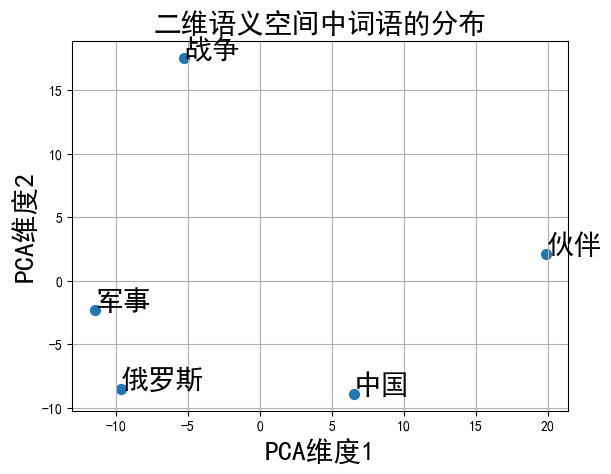

In [18]:
# 可视化

words = ['中国', '俄罗斯', '军事', '战争','伙伴',]
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

## 总结
从结果可以看到“军事”和“战争”距离较远，“军事”距离“俄罗斯”较近，这也和俄罗斯军事实力强劲有关。“伙伴”和“战争”、“战争”的距离较远，这也符合常识。
“中国”和“俄罗斯”的语义接近性为0.36856955，可以看出中国和俄罗斯的关系是比较紧密的。